In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:
# INDIR="/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat"
# COUNT_INDIR="/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
# OUTDIR= "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/clones_dendro"
# #N_DONORS=4
# DONOR=0
# var_type="init"
#INDIR=""
#sample_names="Control,Flt3l" #"Control,Flt3l,Input"

# INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20"
# OUTDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/clones_dendro"
# DONOR = 3
# COUNT_INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/donor3/mgatk"
# var_type = "mgatkdonor"

INDIR = "/data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/concat/"
OUTDIR = "/data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/concat/barcodes/btwnClones/"
DONOR = 0



In [3]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

0.5.6


In [4]:
out_f = join(OUTDIR, f"donor{DONOR}")


## Load cluster results and plot dendrograms

In [5]:
af_indir = join(INDIR, "sc_af", f"donor{DONOR}")

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")

# if var_type == "init":
#     curr_af_f = join(COUNT_INDIR, "af.tsv")
#     curr_dp_f = join(COUNT_INDIR, "dp.tsv")
#     AF_df = pd.read_csv(curr_af_f, sep="\t", index_col=0).transpose()
#     DP_df = pd.read_csv(curr_dp_f, sep="\t", index_col=0).transpose()
# elif var_type=="simple":
#     curr_ad_f = join(COUNT_INDIR, f"donor{DONOR}.AD.mtx")
#     curr_dp_f = join(COUNT_INDIR, f"donor{DONOR}.DP.mtx")
#     from src.utils.data_io import wrap_load_mtx_df
#     AF_df, DP_df = wrap_load_mtx_df(COUNT_INDIR, prefix=f"donor{DONOR}", 
#                                     vcf_prefix=f"donor{DONOR}", inc_af=True, cell_names=True, 
#                                     cells_meta= f"cell_labels.donor{DONOR}.txt", cells_meta_sep=',')
# elif var_type=="mgatkdonor":
#     curr_af_f = join(COUNT_INDIR, f"d{DONOR}.af.tsv")
#     curr_dp_f = join(COUNT_INDIR, f"d{DONOR}.coverage.tsv")
#     AF_df = pd.read_csv(curr_af_f, sep="\t")
#     DP_df = pd.read_csv(curr_dp_f, sep="\t")

# DP_df.index.name = "Variant"
# DP_df.columns.name = "Cell"
# AF_df.index.name = "Variant"
# AF_df.columns.name = "Cell"

In [6]:
print(AF_df.shape)
AF_df.head()

(68, 9023)


,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
Variant,,,,,,,,,,,,,,,,,,,,,
10397G,1.000000,1.0,0.0,0.8,1.0,1.0,1.0,1.0,1.000000,1.0,...,0.979798,1.000000,1.0,1.000000,1.000000,1.000000,1.0,0.978495,1.0,1.000000
10463C,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10559G,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.062500,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10589A,0.882353,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.000000,0.984848,1.0,0.970588,0.736842,0.966102,1.0,1.000000,1.0,1.000000
11251G,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,...,0.000000,0.036145,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.023256


In [7]:
print(DP_df.shape)
DP_df.head()

(68, 9023)


,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
Variant,,,,,,,,,,,,,,,,,,,,,
10397G,2.0,16.0,1.0,5.0,14.0,58.0,39.0,12.0,15.0,59.0,...,99.0,92.0,116.0,39.0,38.0,69.0,72.0,93.0,71.0,67.0
10463C,11.0,16.0,3.0,9.0,6.0,48.0,30.0,3.0,8.0,39.0,...,78.0,99.0,156.0,22.0,14.0,77.0,58.0,89.0,49.0,91.0
10559G,15.0,26.0,5.0,5.0,10.0,66.0,16.0,5.0,21.0,59.0,...,86.0,80.0,138.0,32.0,13.0,60.0,48.0,77.0,64.0,87.0
10589A,17.0,21.0,6.0,7.0,9.0,67.0,24.0,12.0,18.0,48.0,...,88.0,66.0,135.0,34.0,19.0,59.0,55.0,99.0,71.0,80.0
11251G,13.0,25.0,5.0,7.0,12.0,91.0,37.0,16.0,26.0,75.0,...,78.0,83.0,133.0,45.0,30.0,81.0,90.0,139.0,80.0,86.0


In [8]:
# #for n in range(N_DONORS):
# print(curr_ad_f)
# print(curr_dp_f)
# curr_ad = mmread(curr_ad_f).tocsc()
# curr_dp = mmread(curr_dp_f).tocsc()
# AD_df = pd.DataFrame(curr_ad.todense())
# AD_df.index.name = "Variant"
# AD_df.columns.name = "Cell"
# DP_df = pd.DataFrame(curr_dp.todense())
# DP_df.index.name = "Variant"
# DP_df.columns.name = "Cell"
# AF_df = AD_df/(DP_df+0.001)

In [9]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
# if "donor_index" in cells_meta.columns and "lineage_index" in cells_meta.columns:
#     cells_meta = cells_meta.sort_values(["donor_index", "lineage_index"])
#AD_df = pd.merge(AD_df, vcf[["#CHROM", "POS", "ALT"]], how="inner", left_index=True,right_index=True).set_index(["#CHROM", "POS", "ALT"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR]
curr_labels

,ID,lineage,donor,condition
0,AAACGAAAGAATCAAC-1_Control,0,0,Control
1,AAATGAGAGAGACTCG-1_Control,0,0,Control
2,AACAAAGTCAAGTTGC-1_Control,0,0,Control
3,AACAAAGTCACATCCC-1_Control,0,0,Control
4,AACCAACGTTCATTTC-1_Control,0,0,Control
...,...,...,...,...
9018,TGATCAGAGAGCACTG-1_Input,33,0,Input
9019,TGCACCTCAAGCAATA-1_Input,33,0,Input
9020,TGCTATTTCGCGTTCT-1_Input,33,0,Input
9021,TTGCTTATCCACACCT-1_Input,33,0,Input


In [13]:
def calc_mean(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].mean(axis=1)

def calc_median(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].median(axis=1)

clustering
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


clustering
cmap None
clustering
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


clustering
cmap None
clustering
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


clustering
cmap None
clustering
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


clustering
cmap None


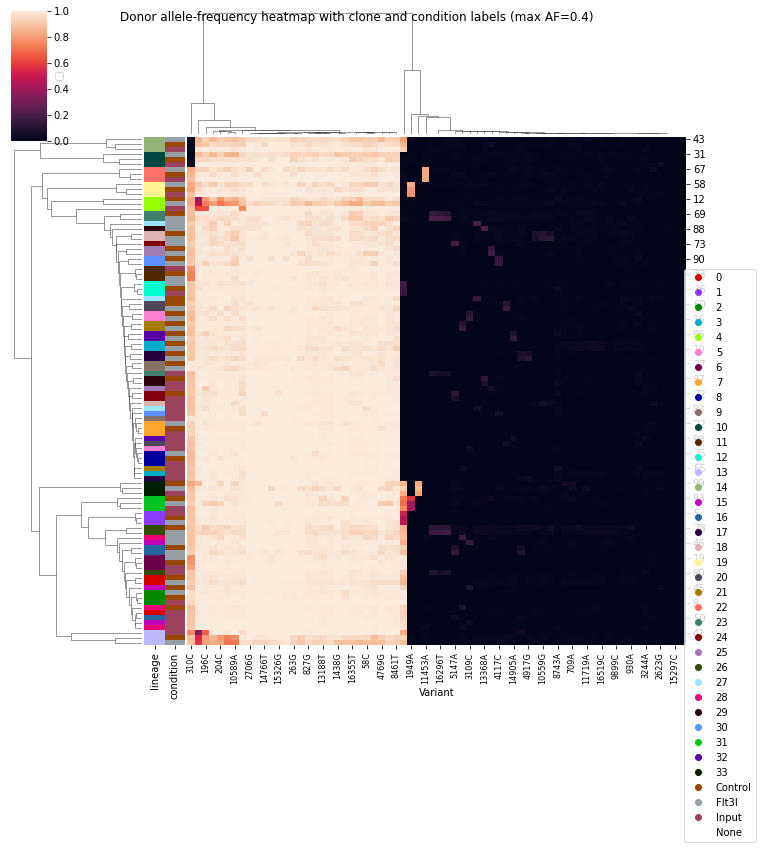

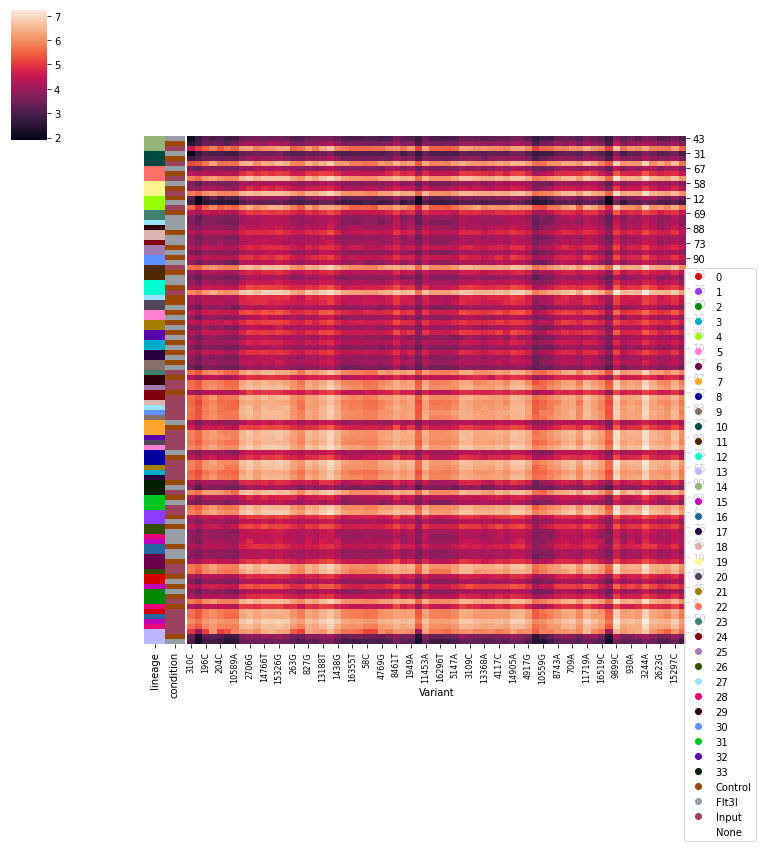

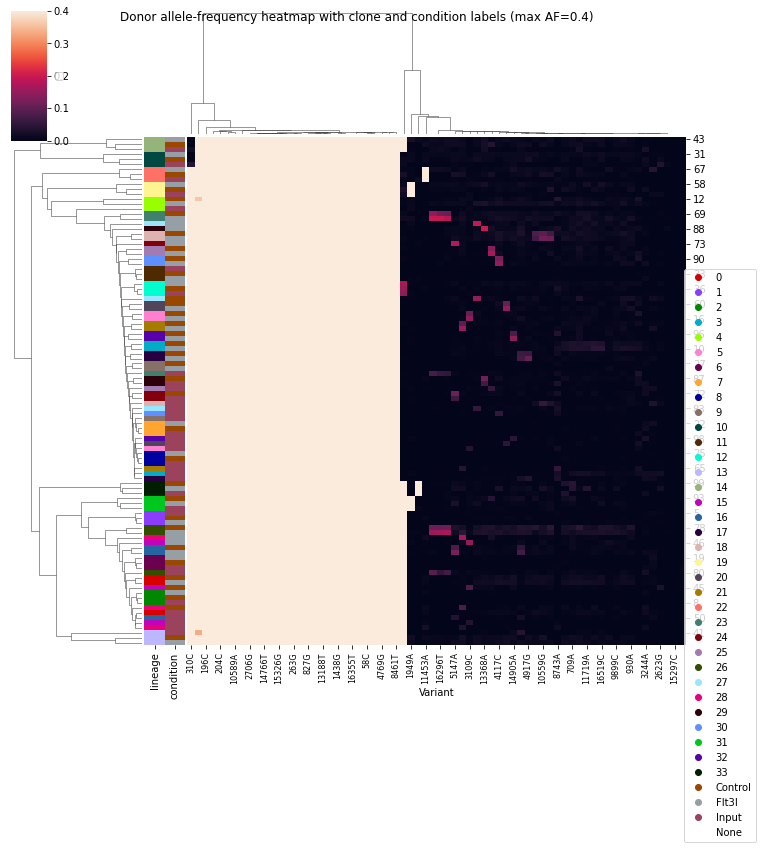

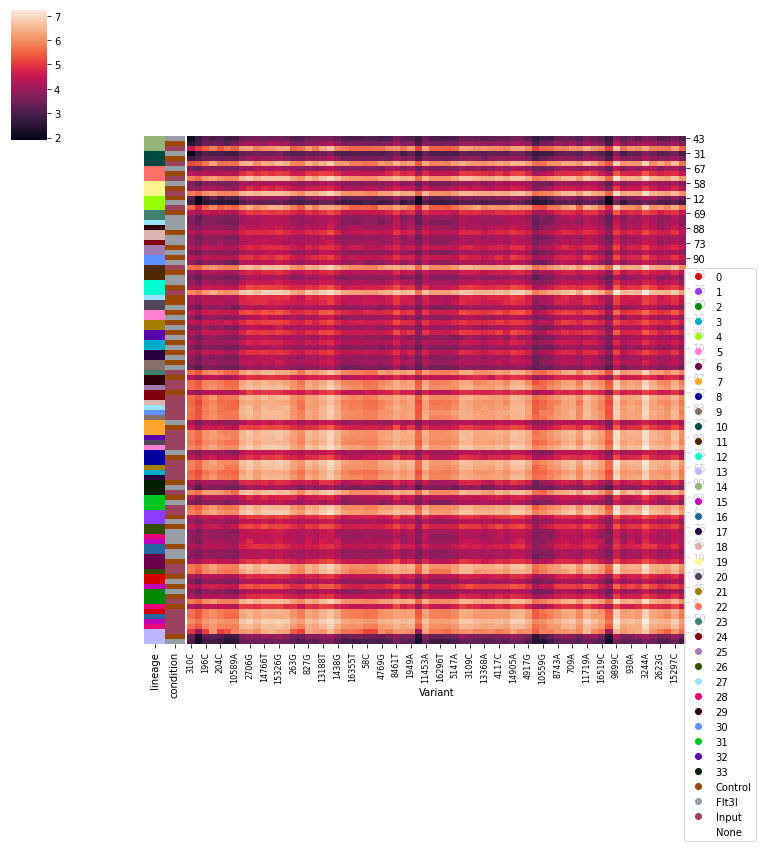

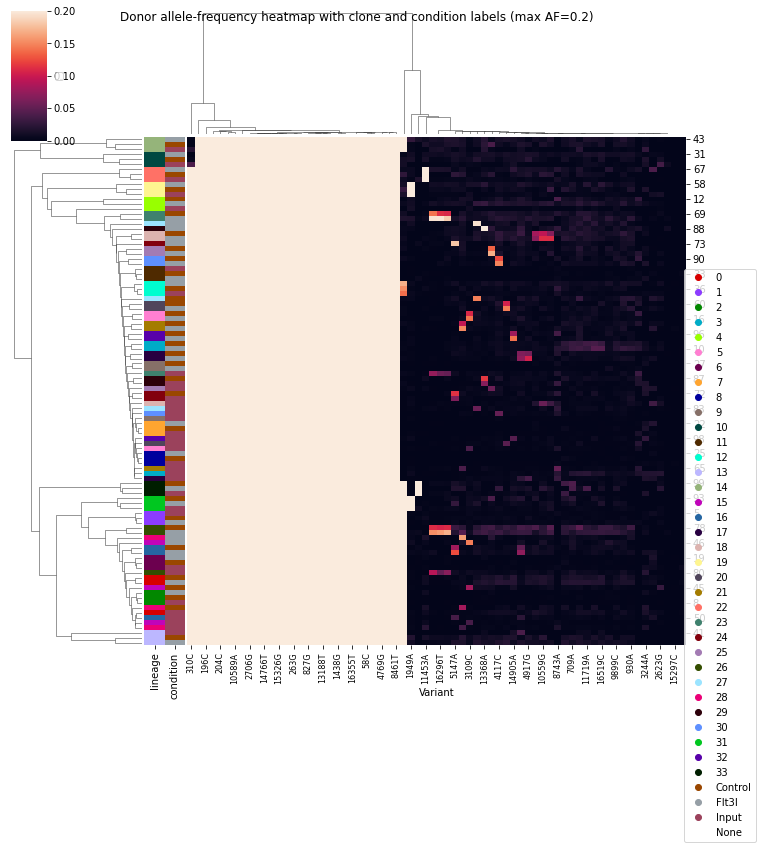

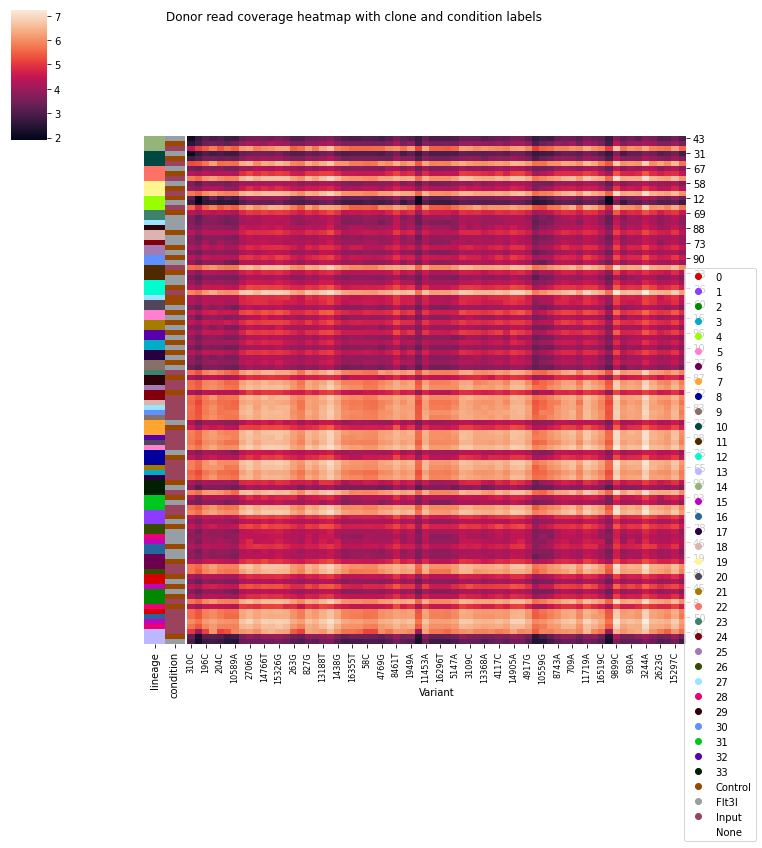

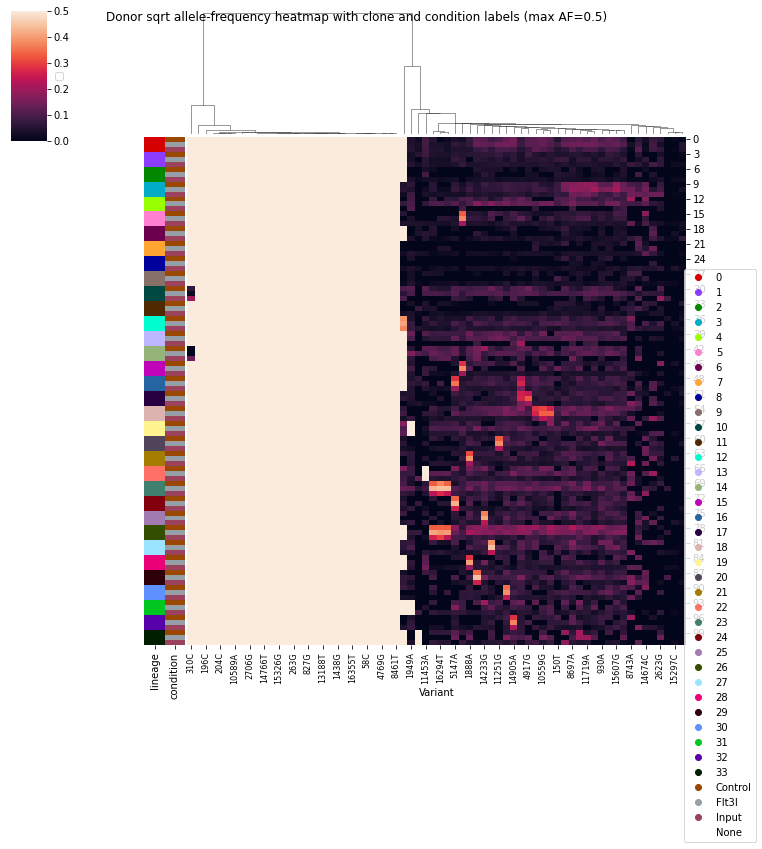

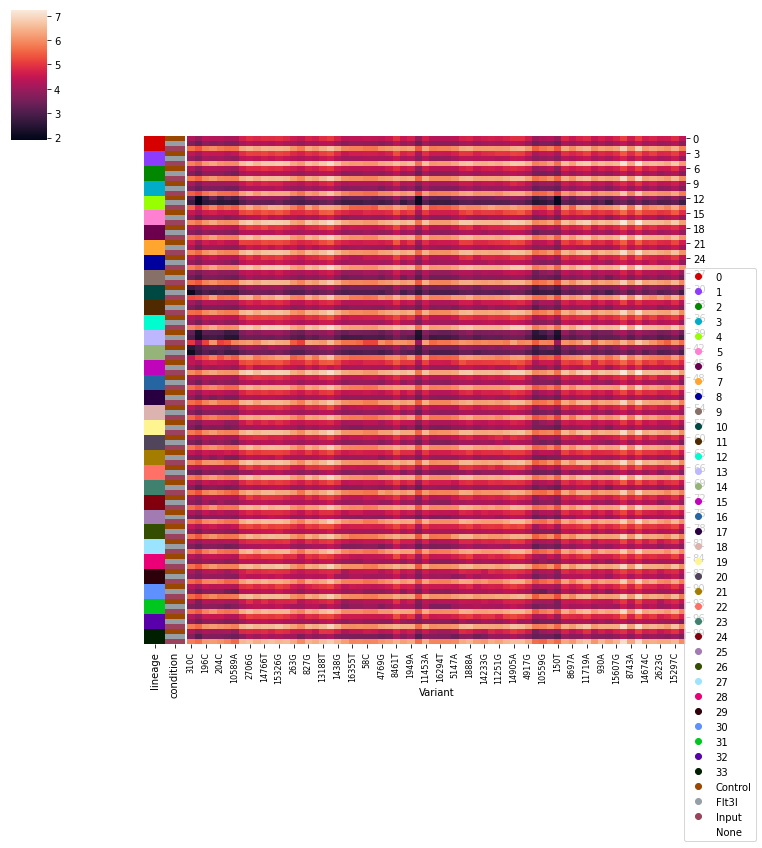

In [11]:
mean_af = curr_labels.groupby(["lineage", "condition"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage", "condition"]]

#mean_dp = curr_labels.groupby(["lineage", "condition"]).apply(calc_mean, af=nlog2(DP_df))
mean_dp = curr_labels.groupby(["lineage", "condition"]).apply(calc_mean, af=np.log2(DP_df+1))
anno_dp = mean_dp.reset_index()[["lineage", "condition"]]
mean_dp = mean_dp.reset_index(drop=True)

na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index), "condition":na_mean_af.index})), 
                        ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     
    
################
## Plotting
################
## 1.
g1 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True)
g1.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
fu.helper_save(out_f+".raw.clust.AF.png", f=g1.figure)

inds = g1.dendrogram_row.dendrogram["leaves"]
cols = g1.dendrogram_col.dendrogram["leaves"]
g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=anno_dp.iloc[inds])
fu.helper_save(out_f+".raw.clust.DP.png", f=g1d.figure)


# ## 2.
g2 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True, vmax=0.4, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
g2.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
fu.helper_save(out_f+".raw.clust.max4.AF.png")
inds = g2.dendrogram_row.dendrogram["leaves"]
cols = g2.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(mean_dp.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=anno_dp.iloc[inds])
fu.helper_save(out_f+".raw.clust.max4.DP.png")


## 3.
g = ch.plot_cluster(na_concat, row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True, vmax=0.2, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
fu.helper_save(out_f+".na.clust.max2.AF.png")

inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds])
plt.suptitle("Donor read coverage heatmap with clone and condition labels ")
fu.helper_save(out_f+".na.clust.max2.DP.png")


# ## 4.
g = ch.plot_cluster(np.sqrt(na_concat), row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=False, to_col_clust=True, vmax=0.5, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
fu.helper_save(out_f+".na.max5.AF.png")
#inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[:,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds])
fu.helper_save(out_f+".na.max5.DP.png")

#plt.close('all')

# Do the same but not grouping by condition

In [14]:
mean_af = curr_labels.groupby(["lineage"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage"]]

#mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=nlog2(DP_df))
mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=np.log2(DP_df+1))
anno_dp = mean_dp.reset_index()[["lineage"]]
mean_dp = mean_dp.reset_index(drop=True)

na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index)})), ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     
    
################
## Plotting
################
## 1.
g1 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True)
g1.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
fu.helper_save(out_f+".NoCondition.raw.clust.AF.png", f=g1.figure)

inds = g1.dendrogram_row.dendrogram["leaves"]
cols = g1.dendrogram_col.dendrogram["leaves"]
g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=anno_dp.iloc[inds])
fu.helper_save(out_f+".NoCondition.raw.clust.DP.png", f=g1d.figure)


# ## 2.
g2 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True, vmax=0.4, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
g2.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
fu.helper_save(out_f+".NoCondition.raw.clust.max4.AF.png")
inds = g2.dendrogram_row.dendrogram["leaves"]
cols = g2.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(mean_dp.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=anno_dp.iloc[inds])
fu.helper_save(out_f+".NoCondition.raw.clust.max4.DP.png")


## 3.
g = ch.plot_cluster(na_concat, row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True, vmax=0.2, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
fu.helper_save(out_f+".NoCondition.na.clust.max2.AF.png")

inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds])
plt.suptitle("Donor read coverage heatmap with clone and condition labels ")
fu.helper_save(out_f+".NoCondition.na.clust.max2.DP.png")


# ## 4.
g = ch.plot_cluster(np.sqrt(na_concat), row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=False, to_col_clust=True, vmax=0.5, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
fu.helper_save(out_f+".NoCondition.na.max5.AF.png")
#inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[:,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds])
fu.helper_save(out_f+".NoCondition.na.max5.DP.png")

#plt.close('all')

clustering


KeyboardInterrupt: 

## Run for median

clustering
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


clustering
cmap None
clustering
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


clustering
cmap None
clustering
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


clustering
cmap None
clustering
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


clustering
cmap None


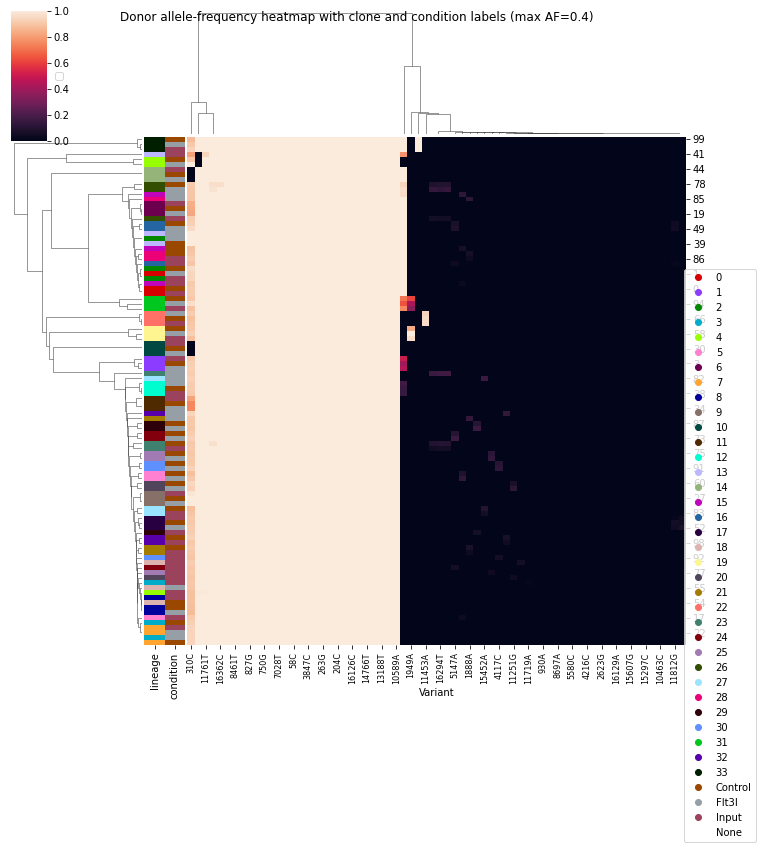

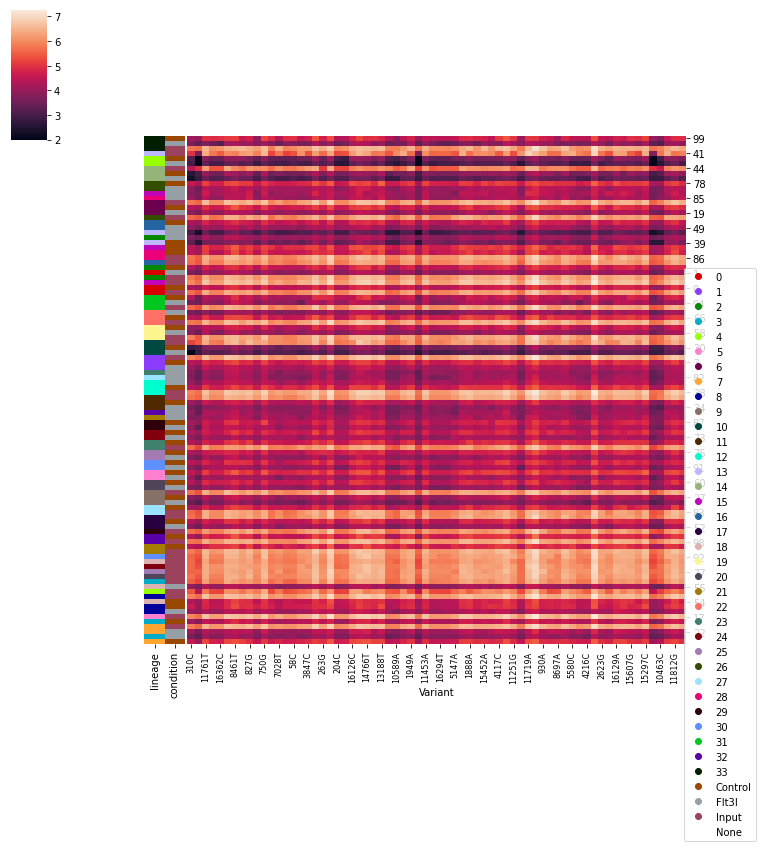

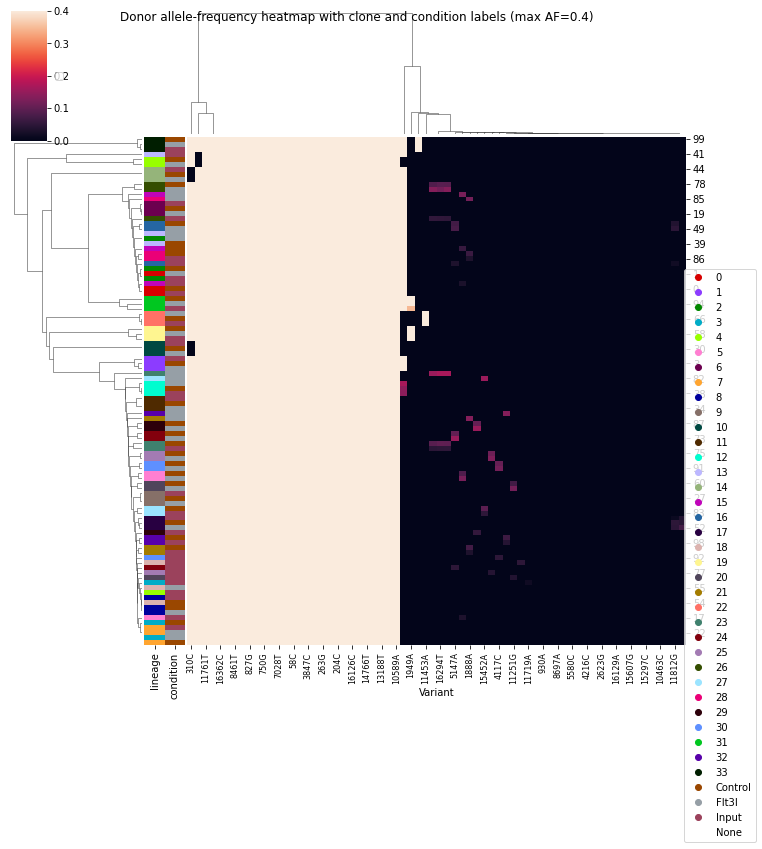

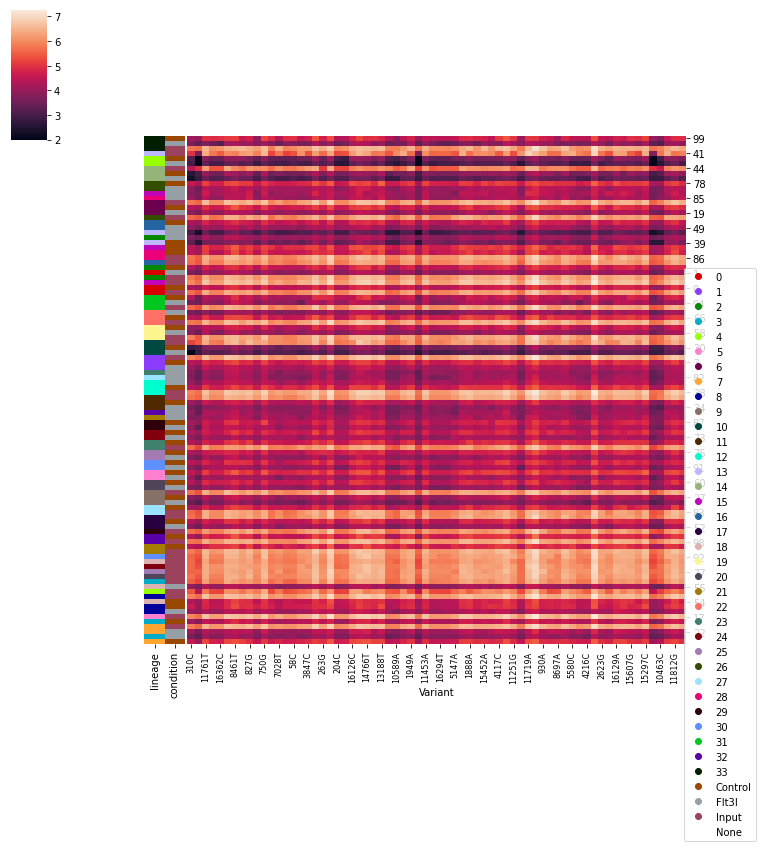

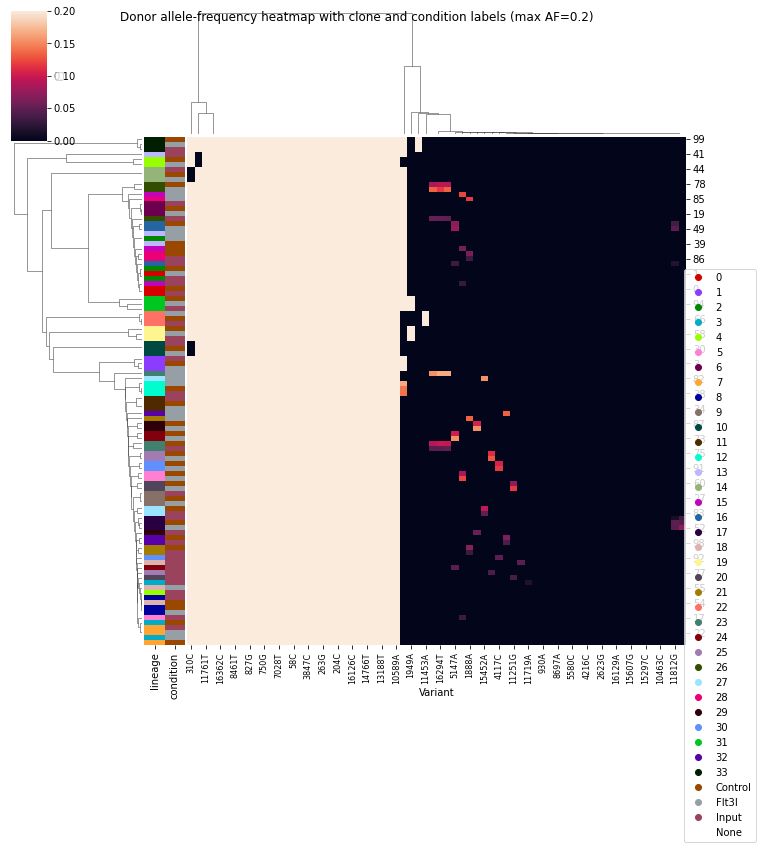

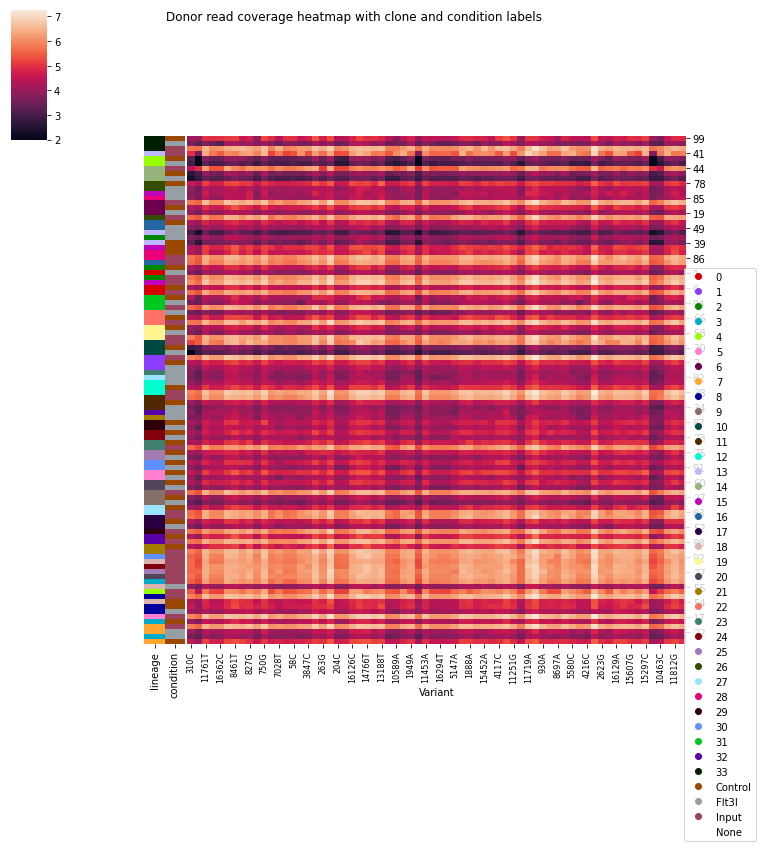

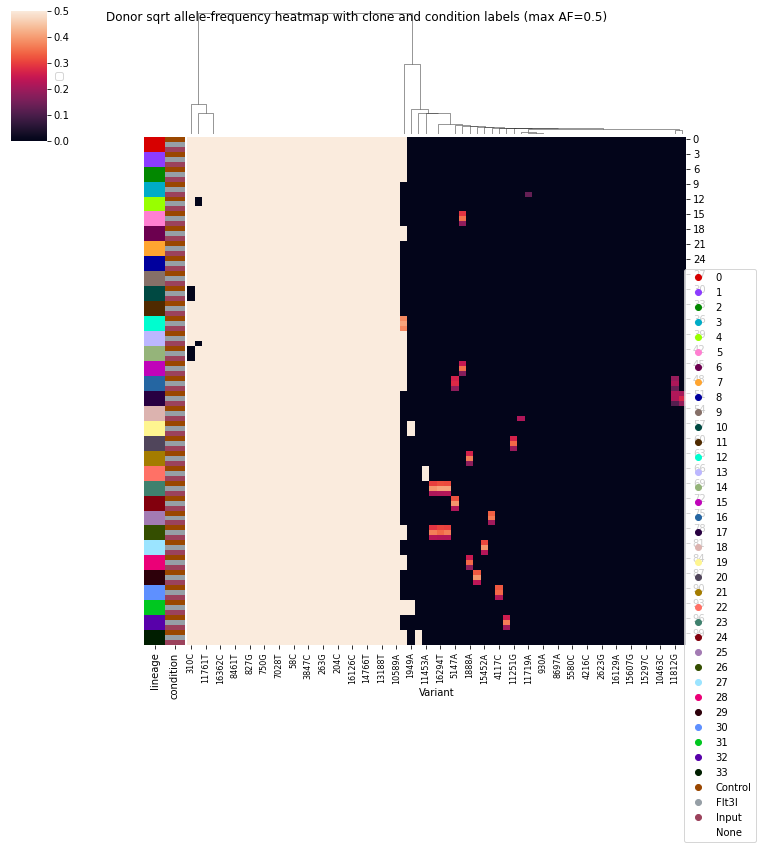

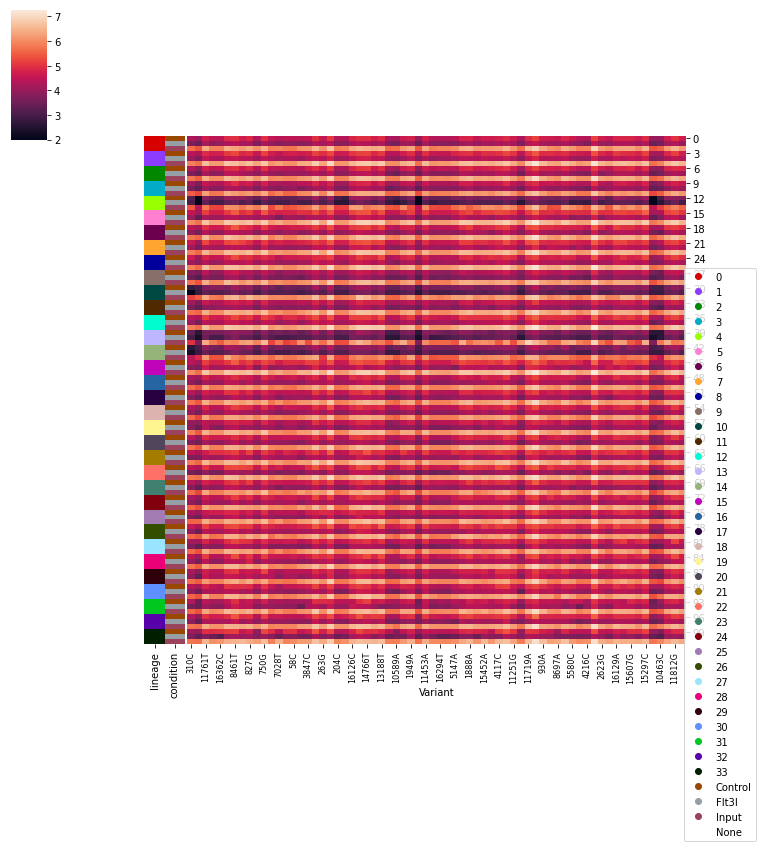

In [16]:
median_out_f = out_f + "_MEDIAN"
median_af = curr_labels.groupby(["lineage", "condition"]).apply(calc_median, af=AF_df)
anno = median_af.reset_index()[["lineage", "condition"]]

#median_dp = curr_labels.groupby(["lineage", "condition"]).apply(calc_median, af=nlog2(DP_df))
median_dp = curr_labels.groupby(["lineage", "condition"]).apply(calc_median, af=np.log2(DP_df+1))
anno_dp = median_dp.reset_index()[["lineage", "condition"]]
median_dp = median_dp.reset_index(drop=True)

na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_median_af = na_cells.groupby("condition").apply(calc_median, af=AF_df)

if not (na_median_af.shape[0] == 0):
    print('na shape', na_median_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_median_af.index), "condition":na_median_af.index})), 
                        ignore_index=True)
    na_concat = pd.concat((median_af.reset_index(drop=True), na_median_af.reset_index(drop=True)), ignore_index=True)
    na_median_dp = na_cells.groupby("condition").apply(calc_median, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((median_dp, na_median_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = median_af.reset_index(drop=True)
    na_dp_concat = median_dp
     
    
################
## Plotting
################
## 1.
g1 = ch.plot_cluster((median_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True)
g1.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
fu.helper_save(median_out_f+".raw.clust.AF.png", f=g1.figure)

inds = g1.dendrogram_row.dendrogram["leaves"]
cols = g1.dendrogram_col.dendrogram["leaves"]
g1d = ch.plot_cluster(median_dp.iloc[inds, cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=anno_dp.iloc[inds])
fu.helper_save(median_out_f+".raw.clust.DP.png", f=g1d.figure)


# ## 2.
g2 = ch.plot_cluster((median_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True, vmax=0.4, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
g2.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
fu.helper_save(median_out_f+".raw.clust.max4.AF.png")
inds = g2.dendrogram_row.dendrogram["leaves"]
cols = g2.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(median_dp.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=anno_dp.iloc[inds])
fu.helper_save(median_out_f+".raw.clust.max4.DP.png")


## 3.
g = ch.plot_cluster(na_concat, row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True, vmax=0.2, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
fu.helper_save(median_out_f+".na.clust.max2.AF.png")

inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds])
plt.suptitle("Donor read coverage heatmap with clone and condition labels ")
fu.helper_save(median_out_f+".na.clust.max2.DP.png")


# ## 4.
g = ch.plot_cluster(np.sqrt(na_concat), row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=False, to_col_clust=True, vmax=0.5, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
fu.helper_save(median_out_f+".na.max5.AF.png")
#inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[:,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds])
fu.helper_save(median_out_f+".na.max5.DP.png")

#plt.close('all')